In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

In [163]:
df = pd.read_csv('C:/Users/pjwoo/Desktop/healthcare/mimic3d.csv')

In [164]:
df.isnull().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [165]:
df['religion'].fillna(value='NOT SPECIFIED', inplace=True)
df.dropna(subset=['AdmitDiagnosis'], how='any', inplace=True)
df['marital_status'].fillna(value='UNKNOWN (DEFAULT)', inplace=True)

In [166]:
df.AdmitDiagnosis.nunique()

15682

In [167]:
df.AdmitDiagnosis.value_counts().head(50)

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
UPPER GI BLEED                                                580
ABDOMINAL PAIN                                                554
FEVER                                                         510
DIABETIC KETOACIDOSIS                                         462
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA      450
S/P FALL  

In [168]:
coronary = df[df['AdmitDiagnosis'].str.contains(pat='CORONARY ARTERY DISEASE')]

In [169]:
coronary.AdmitDiagnosis.nunique()

708

In [170]:
coronary.AdmitDiagnosis.value_counts().head(50)

CORONARY ARTERY DISEASE                                                                840
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA                              583
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA                               450
CORONARY ARTERY DISEASE\CATH                                                           227
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT WITH AVR /SDA                      67
CORONARY ARTERY DISEASE\CARDIAC CATH                                                    38
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT                                    29
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT                                    28
CORONARY ARTERY DISEASE\ANGIOPLASTY                                                     27
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT WITH MVR /SDA                      22
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT; WITH AVR/SDA                      18

In [171]:
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='CORONARY ARTERY BYPASS'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='CATH'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\CATH'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='AORTIC STENOSIS'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\AORTIC STENOSIS'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='ANGIOPLASTY'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\ANGIOPLASTY'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='VALVE REPLACEMENT'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\VALVE REPLACEMENT'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='CONGESTIVE HEART FAILURE'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\CONGESTIVE HEART FAILURE'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='STENT'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\STENT'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='CHF'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\CONGESTIVE HEART FAILURE'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='ANGINA'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\ANGINA'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='CHEST PAIN'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\CHEST PAIN'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='SDA'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='VESSEL'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat=';'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='INTERVENTION'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\INTERVENTION'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='COROANRY'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='LEFT MAIN'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE'
coronary.loc[coronary['AdmitDiagnosis'].str.contains(pat='AS CORONARY'), 'AdmitDiagnosis'] = 'CORONARY ARTERY DISEASE'

coronary.AdmitDiagnosis.nunique()

C:\Users\pjwoo\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


24

In [172]:
coronary.AdmitDiagnosis.value_counts().head(60)

CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS                         1531
CORONARY ARTERY DISEASE                                                1008
CORONARY ARTERY DISEASE\CATH                                            578
CORONARY ARTERY DISEASE\ANGIOPLASTY                                      50
CORONARY ARTERY DISEASE\STENT                                            34
CORONARY ARTERY DISEASE\VALVE REPLACEMENT                                31
CORONARY ARTERY DISEASE\AORTIC STENOSIS                                  31
CORONARY ARTERY DISEASE\CONGESTIVE HEART FAILURE                         24
CORONARY ARTERY DISEASE\CHEST PAIN                                       21
CORONARY ARTERY DISEASE\INTERVENTION                                     12
CORONARY ARTERY DISEASE\ANGINA                                           10
CORONARY ARTERY DISEASE\CABG                                              4
CORONARY ARTERY DISEASE\LEFT CAROTID ANGIOGRAM                            1
CORONARY ART

In [173]:
coronary.shape

(3346, 28)

In [174]:
print(coronary.AdmitDiagnosis.count(),' - ',coronary.AdmitDiagnosis.nunique(),' - ',(coronary.AdmitDiagnosis.nunique()/coronary.AdmitDiagnosis.count()))

3346  -  24  -  0.007172743574417215


In [175]:
coronary.describe()

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000
mean,150570.471608,67.056784,8.173748,0.100054,1.633156,0.889363,0.670442,41.389722,44.916288,0.402364,0.652630,11.448344,12.365780,0.796704,0.795326,532.284426,0.020921,648.344600,1.387627
std,29255.334925,10.958069,6.981827,0.123070,1.961545,1.394911,0.869635,45.420225,18.308014,0.740003,3.237338,6.112380,7.307352,1.338092,0.559844,343.294931,0.143140,395.315172,0.831058
min,100009.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125487.750000,60.000000,4.920000,0.000000,0.880000,0.480000,0.090000,16.432500,35.830000,0.000000,0.190000,7.290000,9.250000,0.000000,0.550000,316.547500,0.000000,405.570000,1.000000
50%,150278.000000,68.000000,6.330000,0.070000,1.275000,0.670000,0.440000,29.150000,42.210000,0.190000,0.320000,10.680000,12.475000,0.000000,0.740000,458.425000,0.000000,563.775000,1.000000
75%,176094.000000,76.000000,9.130000,0.180000,1.850000,0.920000,1.110000,49.887500,50.265000,0.430000,0.520000,14.947500,16.050000,1.660000,0.950000,667.662500,0.000000,797.455000,2.000000
max,199998.000000,88.000000,153.880000,1.850000,58.820000,52.940000,28.950000,686.480000,342.590000,11.970000,138.410000,63.360000,140.740000,23.530000,15.790000,6578.020000,1.000000,6694.150000,3.000000


<AxesSubplot:ylabel='NumDiagnosis'>

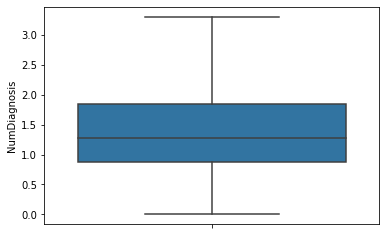

In [176]:
sns.boxplot(y=coronary['NumDiagnosis'], showfliers=False)

In [177]:
coronary = coronary[coronary['NumDiagnosis']<4]

<AxesSubplot:ylabel='LOSdays'>

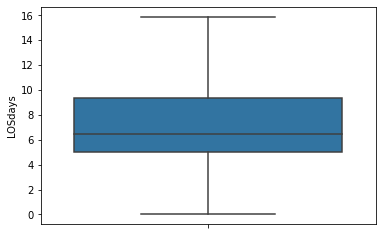

In [178]:
sns.boxplot(y=coronary['LOSdays'], showfliers=False)

In [179]:
coronary = coronary[coronary['LOSdays']<16]

In [180]:
coronary.describe()

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000
mean,150830.470628,66.704940,7.009683,0.101742,1.454766,0.796282,0.625204,38.055294,43.777650,0.343822,0.447323,11.343945,12.216342,0.785641,0.783805,499.470694,0.012016,610.202510,1.312417
std,29353.424437,10.895178,2.919654,0.116162,0.729998,0.600241,0.642230,38.815957,15.007801,0.645522,0.550223,5.738644,5.935579,1.194620,0.311524,304.904872,0.108975,348.044853,0.706653
min,100009.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125432.750000,59.000000,4.960000,0.000000,0.930000,0.490000,0.000000,16.425000,35.737500,0.000000,0.200000,7.450000,9.637500,0.000000,0.570000,308.702500,0.000000,396.487500,1.000000
50%,150808.000000,67.000000,6.250000,0.090000,1.300000,0.680000,0.390000,28.525000,41.940000,0.160000,0.330000,10.690000,12.620000,0.000000,0.760000,444.430000,0.000000,547.685000,1.000000
75%,176622.000000,75.000000,8.630000,0.190000,1.820000,0.920000,1.080000,47.147500,49.510000,0.380000,0.510000,14.672500,16.050000,1.710000,0.950000,634.322500,0.000000,760.187500,2.000000
max,199998.000000,88.000000,15.960000,1.850000,3.940000,9.260000,4.930000,686.480000,271.430000,7.690000,13.720000,63.360000,37.500000,7.890000,5.560000,6578.020000,1.000000,6694.150000,3.000000


In [181]:
data = coronary[['gender','age','LOSdays','admit_type','admit_location','AdmitDiagnosis','insurance',
                 'marital_status','ethnicity','NumDiagnosis','AdmitProcedure','NumProcs','NumCallouts',
                 'NumCPTevents','NumProcEvents','NumTransfers','NumNotes']]
data.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,marital_status,ethnicity,NumDiagnosis,AdmitProcedure,NumProcs,NumCallouts,NumCPTevents,NumProcEvents,NumTransfers,NumNotes
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,MARRIED,WHITE,3.69,Aortocor bypas-3 cor art,0.82,0.00,2.25,2.87,2.05,0.34
7,M,67,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,MARRIED,WHITE,1.09,1 int mam-cor art bypass,0.40,0.10,1.09,2.28,0.60,0.15
16,M,71,6.33,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS,Medicare,MARRIED,UNKNOWN/NOT SPECIFIED,1.74,1 int mam-cor art bypass,0.47,0.16,1.26,2.21,0.63,0.18
23,M,68,3.75,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS,Medicare,MARRIED,WHITE,2.13,1 int mam-cor art bypass,0.80,0.27,1.33,4.27,1.33,0.78
30,M,64,4.25,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS,Private,MARRIED,WHITE,1.88,Aortocor bypas-3 cor art,0.71,0.00,0.00,0.00,1.18,0.50


In [182]:
data.shape

(2996, 17)

In [183]:
le = LabelEncoder()
data['gender_le'] = le.fit_transform(data['gender'])
data['admit_type_le'] = le.fit_transform(data['admit_type'])
data['admit_location_le'] = le.fit_transform(data['admit_location'])
data['insurance_le'] = le.fit_transform(data['insurance'])
data['marital_status_le'] = le.fit_transform(data['marital_status'])
data['ethnicity_le'] = le.fit_transform(data['ethnicity'])
data['AdmitProcedure_le'] = le.fit_transform(data['AdmitProcedure'])
data['AdmitDiagnosis_le'] = le.fit_transform(data['AdmitDiagnosis'])

C:\Users\pjwoo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pjwoo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pjwoo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [184]:
data.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,marital_status,ethnicity,NumDiagnosis,...,NumTransfers,NumNotes,gender_le,admit_type_le,admit_location_le,insurance_le,marital_status_le,ethnicity_le,AdmitProcedure_le,AdmitDiagnosis_le
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,MARRIED,WHITE,3.69,...,2.05,0.34,1,1,3,3,1,27,9,0
7,M,67,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,MARRIED,WHITE,1.09,...,0.60,0.15,1,1,3,2,1,27,0,0
16,M,71,6.33,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS,Medicare,MARRIED,UNKNOWN/NOT SPECIFIED,1.74,...,0.63,0.18,1,0,2,2,1,26,0,15
23,M,68,3.75,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS,Medicare,MARRIED,WHITE,2.13,...,1.33,0.78,1,0,2,2,1,27,0,15
30,M,64,4.25,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS,Private,MARRIED,WHITE,1.88,...,1.18,0.50,1,0,2,3,1,27,9,15


<AxesSubplot:>

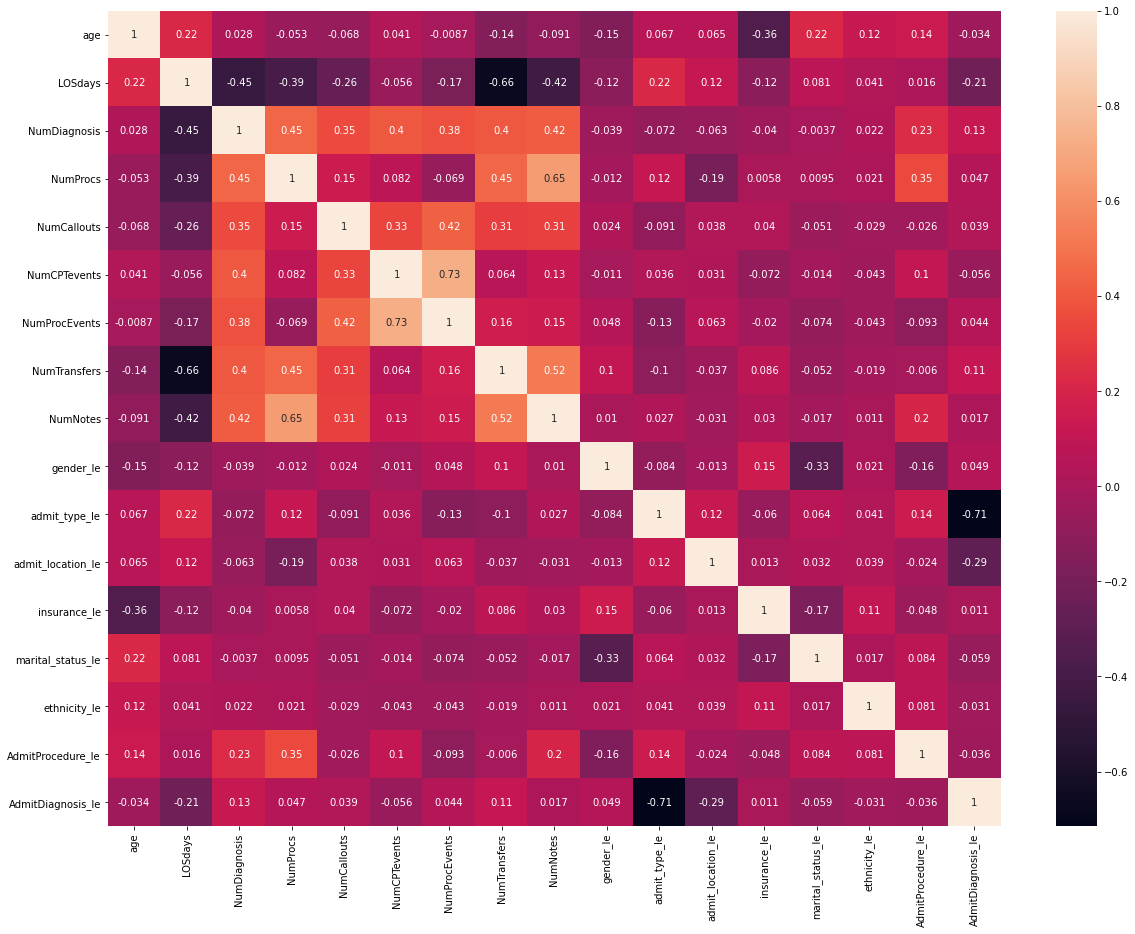

In [185]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

In [186]:
dfnum = data[['gender_le','age','LOSdays','admit_type_le','admit_location_le','AdmitDiagnosis_le','insurance_le',
          'marital_status_le','ethnicity_le','NumDiagnosis','AdmitProcedure_le','NumProcs','NumCallouts',
                 'NumCPTevents','NumProcEvents','NumTransfers','NumNotes']]
dfnum.head()

,gender_le,age,LOSdays,admit_type_le,admit_location_le,AdmitDiagnosis_le,insurance_le,marital_status_le,ethnicity_le,NumDiagnosis,AdmitProcedure_le,NumProcs,NumCallouts,NumCPTevents,NumProcEvents,NumTransfers,NumNotes
4,1,60,4.88,1,3,0,3,1,27,3.69,9,0.82,0.00,2.25,2.87,2.05,0.34
7,1,67,10.08,1,3,0,2,1,27,1.09,0,0.40,0.10,1.09,2.28,0.60,0.15
16,1,71,6.33,0,2,15,2,1,26,1.74,0,0.47,0.16,1.26,2.21,0.63,0.18
23,1,68,3.75,0,2,15,2,1,27,2.13,0,0.80,0.27,1.33,4.27,1.33,0.78
30,1,64,4.25,0,2,15,3,1,27,1.88,9,0.71,0.00,0.00,0.00,1.18,0.50


In [187]:
dfnum.shape

(2996, 17)

In [188]:
X = dfnum.drop('LOSdays', axis='columns')
y = dfnum.LOSdays
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [189]:
X_train.shape

(2247, 16)

In [190]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [201]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of Determination:', linreg.score(X, y))
print('Intercept:', linreg.intercept_)
feature_cols = ['gender_le','age','LOSdays','admit_type_le','admit_location_le','AdmitDiagnosis_le','insurance_le',
          'marital_status_le','ethnicity_le','NumDiagnosis','AdmitProcedure_le','NumProcs','NumCallouts',
                 'NumCPTevents','NumProcEvents','NumTransfers','NumNotes']
print('Coefficients:')
list(zip(feature_cols, linreg.coef_))


Mean Absolute Error: 1.5085262899725278
Mean Squared Error: 3.881457024278527
Root Mean Squared Error: 1.970141371647864
Coefficient of Determination: 0.5382654384077914
Intercept: 9.431225533611729
Coefficients:


[('gender_le', -0.16372676125544017),
 ('age', 0.03270060730901173),
 ('LOSdays', 0.6351758266431285),
 ('admit_type_le', 0.08645424025351242),
 ('admit_location_le', -0.00939911934955226),
 ('AdmitDiagnosis_le', -0.09991247863593788),
 ('insurance_le', 0.0197745440579873),
 ('marital_status_le', 0.005047724315023663),
 ('ethnicity_le', -0.9668238352209226),
 ('NumDiagnosis', 0.005518200039611767),
 ('AdmitProcedure_le', -0.2973159051262319),
 ('NumProcs', -0.10804111087755429),
 ('NumCallouts', 0.545968143879495),
 ('NumCPTevents', -0.16638590013986307),
 ('NumProcEvents', -4.409635500431979),
 ('NumTransfers', -0.07591951261688525)]

In [193]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Variance'] = abs(results['Predicted']-results['Actual'])
results['ErrPerc'] = results['Variance']/results['Actual']*100
results.head()

,Actual,Predicted,Variance,ErrPerc
1830,1.83,-1.406876,3.236876,176.878466
27057,4.17,5.363518,1.193518,28.621539
30126,6.88,7.034905,0.154905,2.251526
45859,6.50,6.358482,0.141518,2.177205
27550,9.13,6.976090,2.153910,23.591571


In [194]:
results.sort_values(by=['Variance'], inplace=True)
results.head()

,Actual,Predicted,Variance,ErrPerc
41048,3.75,3.751775,0.001775,0.047323
817,7.17,7.166594,0.003406,0.047507
21073,7.96,7.964841,0.004841,0.060819
47700,3.96,3.967858,0.007858,0.198431
30088,3.25,3.261385,0.011385,0.350300


In [195]:
X_test.head()

,gender_le,age,admit_type_le,admit_location_le,AdmitDiagnosis_le,insurance_le,marital_status_le,ethnicity_le,NumDiagnosis,AdmitProcedure_le,NumProcs,NumCallouts,NumCPTevents,NumProcEvents,NumTransfers,NumNotes
1830,0,66,1,3,11,2,3,27,3.28,63,2.73,0.55,0.00,1.64,2.19,2.09
27057,1,60,0,2,15,3,1,26,1.44,0,0.24,0.00,0.00,0.00,0.96,0.69
30126,1,68,1,3,0,2,1,27,1.74,6,0.44,0.15,0.58,3.05,0.73,1.33
45859,0,59,0,2,15,3,4,26,1.38,0,0.62,0.15,0.00,0.00,0.77,0.19
27550,1,74,1,2,11,2,1,27,2.41,9,0.77,0.33,1.75,2.30,0.77,0.06


In [196]:
results.Variance.mean()

1.5085262899725278

In [ ]:
feature_cols = ['gender_le','age','LOSdays','admit_type_le','admit_location_le','AdmitDiagnosis_le','insurance_le',
          'marital_status_le','ethnicity_le','NumDiagnosis','AdmitProcedure_le','NumProcs','NumCallouts',
                 'NumCPTevents','NumProcEvents','NumTransfers','NumChartEvents']
list(zip(feature_cols, linreg.coef_))

In [199]:
dfnum.describe()

,gender_le,age,LOSdays,admit_type_le,admit_location_le,AdmitDiagnosis_le,insurance_le,marital_status_le,ethnicity_le,NumDiagnosis,AdmitProcedure_le,NumProcs,NumCallouts,NumCPTevents,NumProcEvents,NumTransfers,NumNotes
count,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000
mean,0.748665,66.704940,7.009683,0.523364,2.088451,9.797063,2.312417,1.789052,25.408879,1.454766,20.801402,0.796282,0.101742,0.625204,0.785641,0.783805,0.447323
std,0.433853,10.895178,2.919654,0.557051,0.876242,6.614009,0.628637,1.465995,4.666655,0.729998,25.280350,0.600241,0.116162,0.642230,1.194620,0.311524,0.550223
min,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,59.000000,4.960000,0.000000,2.000000,0.000000,2.000000,1.000000,26.000000,0.930000,6.000000,0.490000,0.000000,0.000000,0.000000,0.570000,0.200000
50%,1.000000,67.000000,6.250000,0.000000,2.000000,15.000000,2.000000,1.000000,27.000000,1.300000,8.000000,0.680000,0.090000,0.390000,0.000000,0.760000,0.330000
75%,1.000000,75.000000,8.630000,1.000000,3.000000,15.000000,3.000000,3.000000,27.000000,1.820000,47.000000,0.920000,0.190000,1.080000,1.710000,0.950000,0.510000
max,1.000000,88.000000,15.960000,2.000000,4.000000,20.000000,4.000000,5.000000,30.000000,3.940000,82.000000,9.260000,1.850000,4.930000,7.890000,5.560000,13.720000


In [ ]:
df.info()

In [200]:
print(metrics.mean_absolute_error(y_test, y_pred))

1.5085262899725278


In [ ]:
sns.pairplot(dfnum, x_vars=['gender_le','age','admit_type_le','admit_location_le','AdmitDiagnosis_le','insurance_le',
          'marital_status_le','ethnicity_le','NumDiagnosis','AdmitProcedure_le','NumProcs','NumCallouts',
                 'NumCPTevents','NumProcEvents','NumTransfers','NumChartEvents'], y_vars=['LOSdays'],
            height=5, aspect=.8, kind='reg')

In [ ]:
sns.pairplot(dfnum, x_vars=['gender_le','age','admit_type_le','admit_location_le'], y_vars=['LOSdays'],
            height=5, aspect=.8, kind='reg')

In [ ]:
sns.pairplot(dfnum, x_vars=['AdmitDiagnosis_le','insurance_le','marital_status_le','ethnicity_le'], y_vars=['LOSdays'],
            height=5, aspect=.8, kind='reg')

In [ ]:
sns.pairplot(dfnum, x_vars=['NumDiagnosis','AdmitProcedure_le','NumProcs','NumCallouts'], y_vars=['LOSdays'],
            height=5, aspect=.8, kind='reg')

In [ ]:
sns.pairplot(dfnum, x_vars=['NumCPTevents','NumProcEvents','NumTransfers','NumChartEvents'], y_vars=['LOSdays'],
            height=5, aspect=.8, kind='reg')

In [ ]:
dfnum2 = data[['age','LOSdays','admit_type_le','AdmitDiagnosis_le','NumDiagnosis','NumProcs','NumCallouts','NumTransfers']]
dfnum2.head()

In [ ]:
X = dfnum.drop('LOSdays', axis='columns')
y = dfnum.LOSdays
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r_sq = linreg.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

<AxesSubplot:>

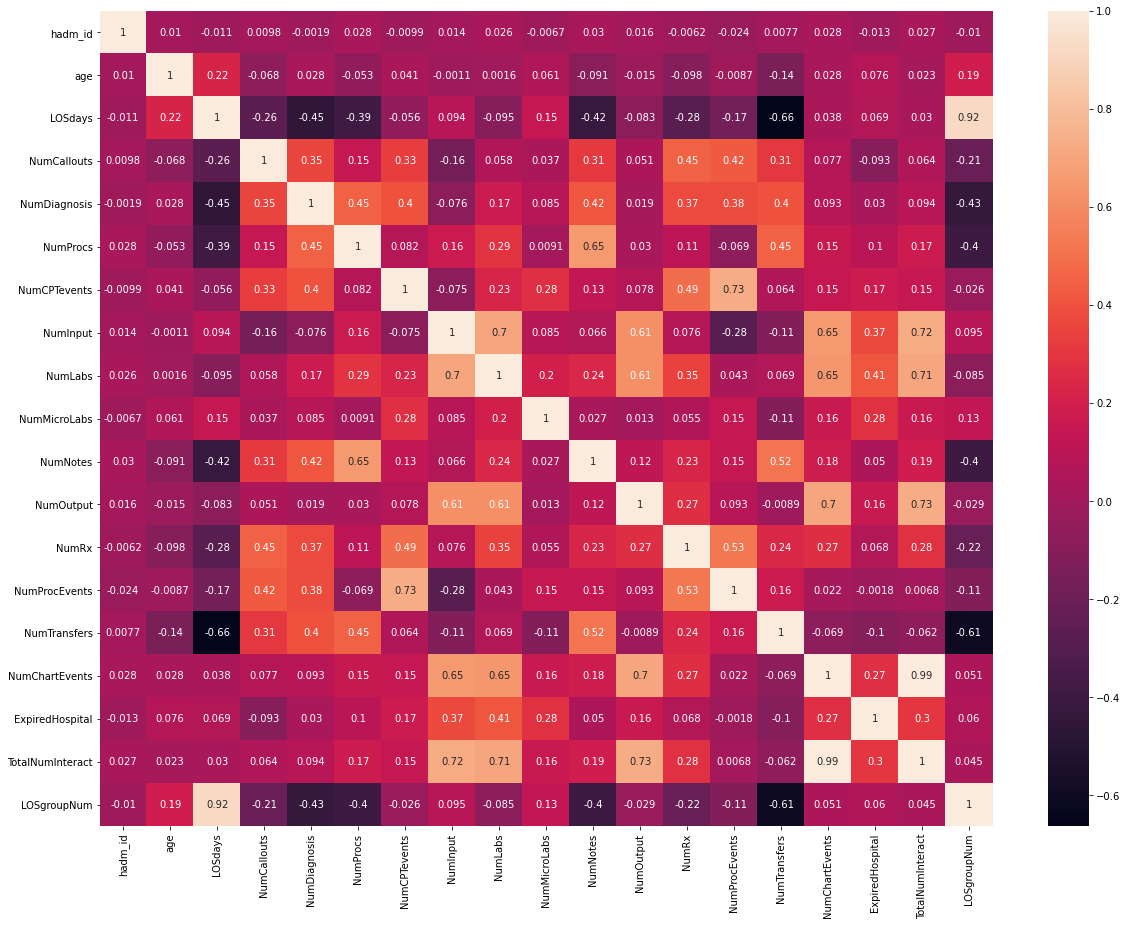

In [198]:
plt.subplots(figsize=(20,15))
sns.heatmap(coronary.corr(), annot=True)